<a href="https://colab.research.google.com/github/gabrielbgomes/bitstarter/blob/master/L%C3%B3gica_Fuzzy_com_Python__Exemplo_das_gorgetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lógica Fuzzy com Python: Exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


# Instalação e importação das bibliotecas

- Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz


In [ ]:
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [ ]:
#Criamos um eixo x : qualidade de comida
qualidade = ctrl.Antecedent(np.arange(0,11,1),'qualidade')

In [ ]:
#Imprimir
qualidade

Antecedent: qualidade

In [ ]:
#valores para eixo x: universe de discursso
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Criamos um eixo x : seviço de atendimento
servico = ctrl.Antecedent(np.arange(0,11,1),'servico')

In [ ]:
servico

Antecedent: servico

In [ ]:
servico.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Consequencia : resultado da gorjeta : Maximo 20 reais
gorjeta = ctrl.Consequent(np.arange(0,21,1),'gorjeta')

In [ ]:
gorjeta

Consequent: gorjeta

In [ ]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [ ]:
#Criamos um grafico para qualidade de comidas
#automf - criar grafico em formato triangular automáticamente
qualidade.automf(number=3,names=['ruim','boa','saborosa'])

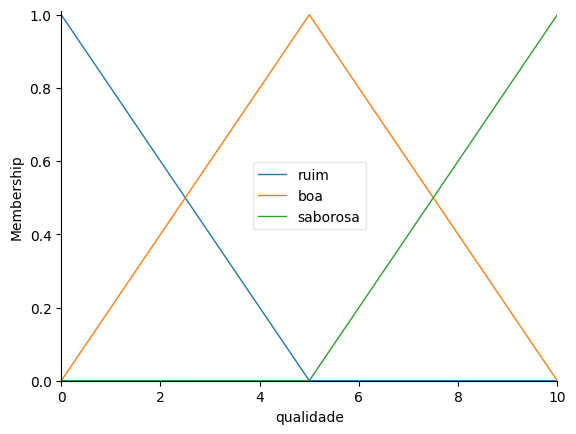

In [ ]:
#Mostrar grafico construido
qualidade.view()

In [ ]:
#Criamos um grafico para qualidade de serviços
servico.automf(number=3,names=['ruim','aceitável','ótimo'])

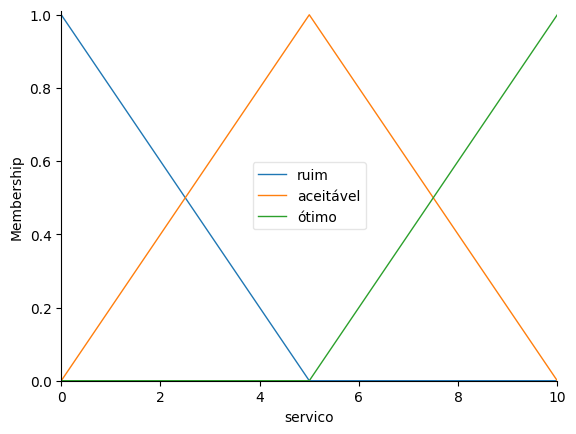

In [ ]:
servico.view()

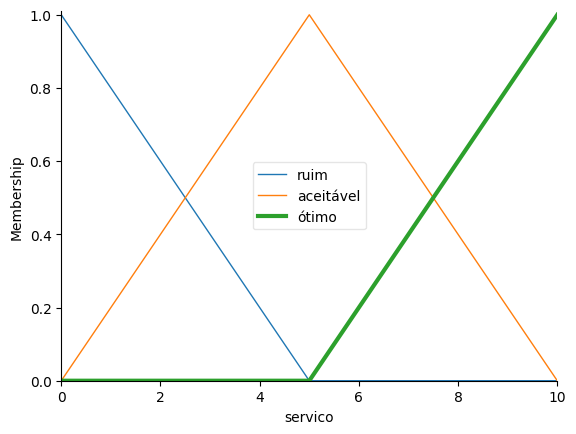

In [ ]:
#Mostrar a função grafico ótimo
servico['ótimo'].view()


In [ ]:
#definicao da funçao gorjeta manualmente
# Triangulo tem 3 vertices
gorjeta['baixa']=fuzz.trimf(gorjeta.universe,[0,0,5])
gorjeta['media']=fuzz.trimf(gorjeta.universe,[5,10,15])
gorjeta['alta']=fuzz.trimf(gorjeta.universe,[15,20,20])

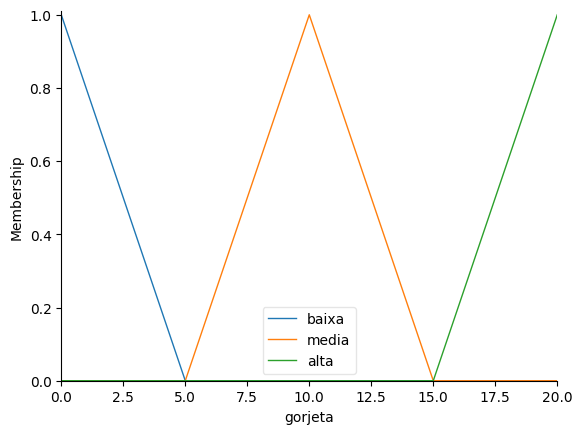

In [ ]:
gorjeta.view()

In [ ]:
#Se a qualidade da comida for ruim ou o serviço for ruim então a gorjeta será baixa
regra1 = ctrl.Rule(qualidade['ruim']|servico['ruim'], gorjeta['baixa'])
#Se o serviço for médio então a gorjeta será média
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
#Se o serviço for bom e a qualidade da comida for saborosa então a gorjeta será alta
regra3=ctrl.Rule(servico['ótimo'] & qualidade['saborosa'],gorjeta['alta'])

## Sistema de controle

In [ ]:
#Aplicar as regras e fazendo defuzzyficação
sistema_controle=ctrl.ControlSystem([regra1,regra2,regra3])


In [ ]:
#Sistema de simulação: criamos um simulador
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 5
sistema.input['servico'] = 5
sistema.compute()

In [ ]:
print(sistema.output['gorjeta'])

10.000000000000002


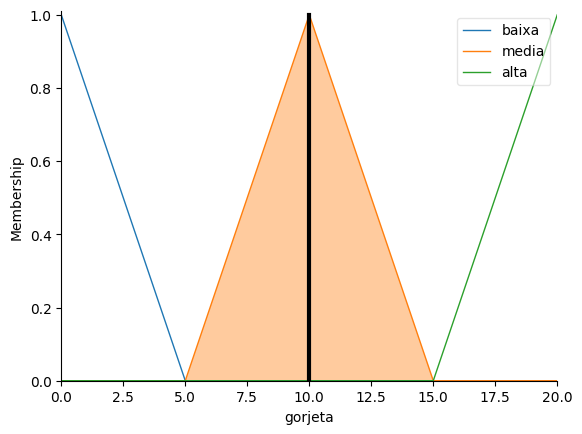

In [ ]:
gorjeta.view(sim = sistema)

# Outras funções

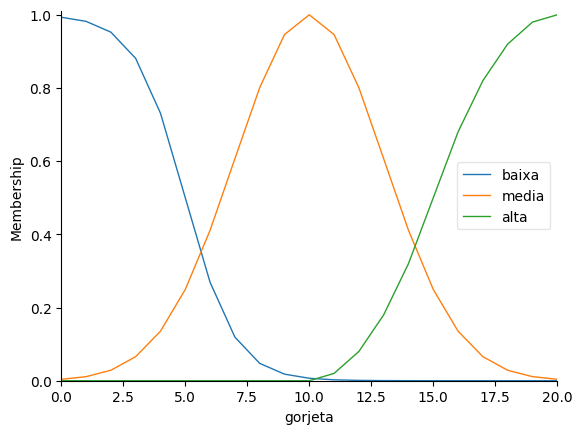

In [ ]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)
gorjeta.view()

In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] & qualidade['saborosa'], gorjeta['alta'])

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 1
sistema.input['servico'] = 1
sistema.compute()

5.662380878042331


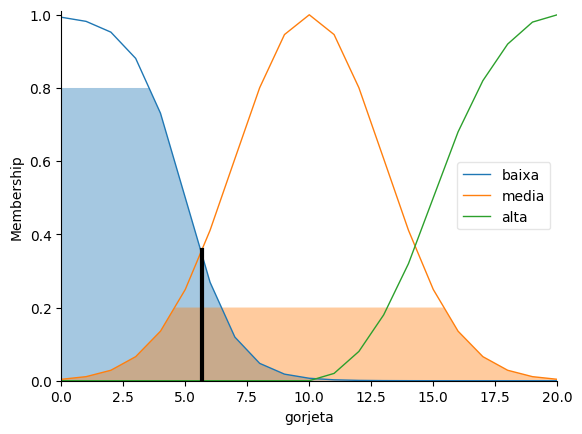

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)